# Logistic Regression with non-linear features

## import library

In [866]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [867]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

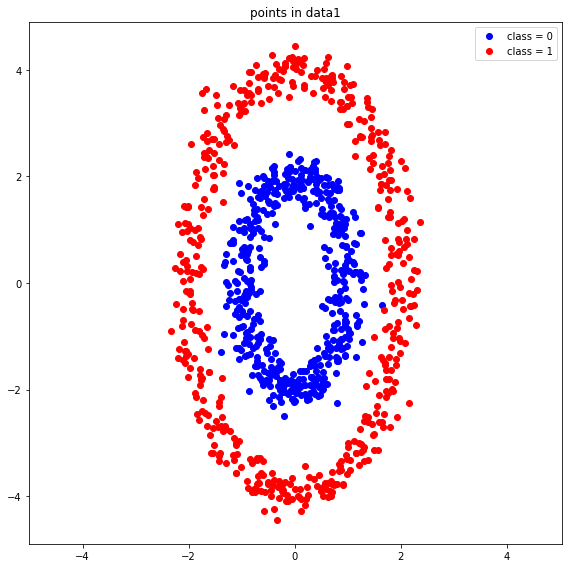

In [868]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

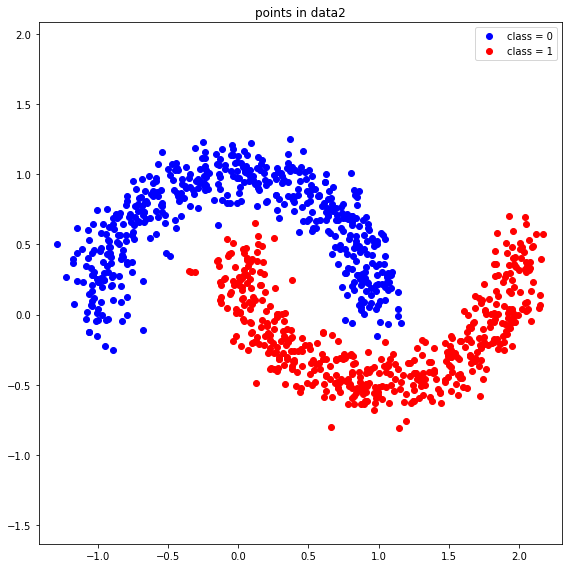

In [869]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [870]:
data1_point

array([[ 0.83159, -0.33906],
       [ 0.87196,  0.24418],
       [ 1.01934,  0.23241],
       ...,
       [ 2.01992, -0.31388],
       [ 2.30028,  0.22118],
       [ 1.82426, -0.14913]])

In [871]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #데이터1포인트가 인풋으로 들어왔을 때 그것의 피쳐함수를 정의하기. 모든 포인트에대한 피쳐벡터 정의 하기 
    #아 이 피쳐를 쌩으로 하는게 아니라 노말라이즈 같은걸 시켜주기 위해 하는구나~?
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 2
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [872]:
# point_x   = data1_point[:, 0]
# point_y   = data1_point[:, 1]
# degree = 6
# out = np.ones(data1_point.shape[0])[:,np.newaxis]
# for i in range(1, degree+1):
#     for j in range(i+1):
#         out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
# print(out.shape)

In [873]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 2 #2->6 6->28
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [874]:
a=compute_feature1(data1_point2)
a.shape

(1000, 6)

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [875]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.inner(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [876]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [877]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_linear_regression(theta, feature)
    value = sigmoid(y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [878]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_logistic_regression(theta, feature)
    residual=-label*np.log(y) - (1 - label)*np.log(1 - y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [879]:
#TODO 
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    loss = (1/number_data1)*np.sum(compute_residual(theta, feature, label))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

## define the gradient of the loss with respect to the model parameter $\theta$

In [880]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    # gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    # gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    # gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,3])/number_data1
    # gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,4])/number_data1
    # gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,5])/number_data1
    # gradient7=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,6])/number_data1
    # gradient8=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,7])/number_data1
    # gradient9=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,8])/number_data1
    # gradient10=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,9])/number_data1
    # gradient11=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,10])/number_data1
    # gradient12=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,11])/number_data1
    # gradient13=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,12])/number_data1
    # gradient14=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,13])/number_data1
    # gradient15=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,14])/number_data1
    # gradient16=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,15])/number_data1
    # gradient17=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,16])/number_data1
    # gradient18=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,17])/number_data1
    # gradient19=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,18])/number_data1
    # gradient20=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,19])/number_data1
    # gradient21=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,20])/number_data1
    # gradient22=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,21])/number_data1
    # gradient23=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,22])/number_data1
    # gradient24=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,23])/number_data1
    # gradient25=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,24])/number_data1
    # gradient26=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,25])/number_data1
    # gradient27=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,26])/number_data1
    # gradient28=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,27])/number_data1
    # gradient=np.array([gradient1,gradient2,gradient3,gradient4,gradient5,gradient6,gradient7,gradient8,gradient9,
    # gradient10,gradient11,gradient12,gradient13,gradient14,gradient15,gradient16,gradient17,gradient18,
    # gradient19,gradient20,gradient21,gradient22,gradient23,gradient24,gradient25,gradient26,gradient27,gradient28])
    gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,3])/number_data1
    gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,4])/number_data1
    gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,5])/number_data1
    gradient=np.array([gradient1,gradient2,gradient3,gradient4,gradient5,gradient6])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [881]:
# def compute_accuracy(theta, feature, label):

#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
#     a=compute_logistic_regression(theta, feature)
#     c=np.where(a>0.5,1,0)
#     d=[]
#     for i,j in zip(label,c):
#         if i==j:
#             d.append(1)
#     accuracy=len(d)/len(label)             
#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++

#     return accuracy

In [882]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
    prob=compute_logistic_regression(theta, feature)
    predicted_labels=np.where(prob>0.5,1,0)
    diff = predicted_labels - label
    accuracy=1.0 - (float(np.count_nonzero(diff)) / len(diff))         
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [888]:
data1_number_iteration   = 1000
data2_number_iteration   = 1000

data1_learning_rate   = 0.01 
data2_learning_rate   = 0.01 

data1_number_feature    = 6##아 여기서 사용할 포인터의 피쳐벡터를 설정하는구나 마치 트레인셋같은개념인가?
data2_number_feature    = 6 

theta1  = np.zeros(data1_number_feature)#그래서 이 수만큼 세타의 수도 같이 조정이된다. 
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [889]:
point_class_0   = np.ones((1000, 3))

In [890]:
point_class_0[:, 1] = data1_point[:,0]
point_class_0[:, 2] = data1_point[:,1]
data1_point2=point_class_0

In [891]:
from tqdm import tqdm

In [892]:
for i in tqdm(range(data1_number_iteration)):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #지금 그라디언트디센트구하는과정에서 넘파이 결합할때 3개밖에안된다. 그걸 해소해야한다.
    theta1      = theta1-(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label))
    loss1       = compute_loss(theta1, compute_feature1(data1_point2), data1_label)
    accuracy1   = compute_accuracy(theta1, compute_feature1(data1_point2), data1_label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

100%|██████████| 1000/1000 [00:01<00:00, 975.06it/s]


In [893]:
theta1.shape

(6,)

In [894]:
(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label)).shape

(6,)

In [895]:
point_class_1   = np.ones((1000, 3))
point_class_1[:, 1] = data2_point[:,0]
point_class_1[:, 2] = data2_point[:,1]
data2_point2=point_class_0

In [896]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2-(data2_learning_rate*compute_gradient(theta2, compute_feature2(data2_point2), data2_label))
    loss2       = compute_loss(theta2, compute_feature2(data2_point2), data2_label)
    accuracy2   = compute_accuracy(theta2, compute_feature2(data2_point2), data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

In [897]:
compute_loss(theta2, compute_feature2(data2_point2), data2_label)

0.29713183435459695

In [898]:
y=compute_logistic_regression(theta2, compute_feature2(data2_point2))
residual=-data2_label*np.log(y) - (1 - data2_label)*np.log(1 - y)
residual

array([0.33678208, 0.3458149 , 0.412559  , 0.46213121, 0.54528879,
       0.30080593, 0.62428298, 0.39075864, 0.40292076, 0.27382738,
       0.35894032, 0.48654237, 0.4554832 , 0.37616097, 0.31710521,
       0.29601665, 0.49595252, 0.47798878, 0.5422703 , 0.42191654,
       0.56182305, 0.27533965, 0.5125896 , 0.41750293, 0.31301683,
       0.65631648, 0.45737958, 0.41138726, 0.26804261, 0.64133307,
       0.39902263, 0.38601592, 0.29671713, 0.43907381, 0.53549592,
       0.40022806, 0.37816538, 0.45745174, 0.39919422, 0.40637434,
       0.6206917 , 0.49075915, 0.36818028, 0.44481185, 0.41653097,
       0.4324545 , 0.34505296, 0.37455957, 0.40927149, 0.27560343,
       0.46279117, 0.4987265 , 0.41072754, 0.37250345, 0.62924781,
       0.41142635, 0.46677426, 0.36403009, 0.55875602, 0.33628379,
       0.39420559, 0.43161714, 0.38924978, 0.49503075, 0.45484616,
       0.36782641, 0.35135105, 0.35457174, 0.56090409, 0.47966596,
       0.56354169, 0.43853204, 0.59528144, 0.34418714, 0.49817

In [899]:
y=compute_logistic_regression(theta2, compute_feature2(data2_point2))
y

array([0.28593557, 0.29235654, 0.33804586, 0.37006032, 0.42032565,
       0.25977859, 0.46435464, 0.32345657, 0.33163494, 0.23953666,
       0.30158397, 0.3852517 , 0.36585852, 0.31350818, 0.27174587,
       0.25622496, 0.39100944, 0.37997085, 0.41857326, 0.34421123,
       0.42983133, 0.24068582, 0.40105745, 0.34131044, 0.2687624 ,
       0.48124132, 0.36705996, 0.33726977, 0.23512481, 0.47341002,
       0.32902449, 0.3202403 , 0.25674578, 0.3553668 , 0.41462108,
       0.32983281, 0.31488282, 0.36710563, 0.3291396 , 0.33393921,
       0.46242753, 0.38783851, 0.30800758, 0.35905514, 0.34066991,
       0.35108562, 0.29181716, 0.31240795, 0.3358661 , 0.24088608,
       0.37047592, 0.39269643, 0.33683241, 0.31099273, 0.46700744,
       0.33729567, 0.37297838, 0.30512971, 0.42807992, 0.28557967,
       0.32578457, 0.35054202, 0.32243499, 0.39044783, 0.36545442,
       0.30776267, 0.29626334, 0.29852621, 0.42930713, 0.38100988,
       0.4308104 , 0.35501746, 0.44859264, 0.29120373, 0.39236

In [900]:
residual=-data2_label*np.log(y) - (1 - data2_label)*np.log(1 - y)
residual

array([0.33678208, 0.3458149 , 0.412559  , 0.46213121, 0.54528879,
       0.30080593, 0.62428298, 0.39075864, 0.40292076, 0.27382738,
       0.35894032, 0.48654237, 0.4554832 , 0.37616097, 0.31710521,
       0.29601665, 0.49595252, 0.47798878, 0.5422703 , 0.42191654,
       0.56182305, 0.27533965, 0.5125896 , 0.41750293, 0.31301683,
       0.65631648, 0.45737958, 0.41138726, 0.26804261, 0.64133307,
       0.39902263, 0.38601592, 0.29671713, 0.43907381, 0.53549592,
       0.40022806, 0.37816538, 0.45745174, 0.39919422, 0.40637434,
       0.6206917 , 0.49075915, 0.36818028, 0.44481185, 0.41653097,
       0.4324545 , 0.34505296, 0.37455957, 0.40927149, 0.27560343,
       0.46279117, 0.4987265 , 0.41072754, 0.37250345, 0.62924781,
       0.41142635, 0.46677426, 0.36403009, 0.55875602, 0.33628379,
       0.39420559, 0.43161714, 0.38924978, 0.49503075, 0.45484616,
       0.36782641, 0.35135105, 0.35457174, 0.56090409, 0.47966596,
       0.56354169, 0.43853204, 0.59528144, 0.34418714, 0.49817

In [901]:
for i in residual:
    print(i)

0.3367820799079815
0.34581489754611633
0.41255900404134843
0.462131214174744
0.5452887941329093
0.30080593396693955
0.6242829802258215
0.3907586351116146
0.40292075774913505
0.2738273775206965
0.3589403206063317
0.48654236737116424
0.4554831969167404
0.3761609718799775
0.3171052133841847
0.29601665045693876
0.4959525156231312
0.47798878479524715
0.5422703004092788
0.4219165395772944
0.561823051935844
0.2753396460640832
0.5125895973588916
0.4175029323973206
0.31301683237708955
0.6563164842686563
0.45737958041999627
0.4113872641004776
0.2680426139917575
0.6413330655303373
0.3990226335517056
0.38601591932531915
0.29671713381617837
0.4390738097812768
0.5354959202362736
0.40022806415544704
0.3781653826199056
0.4574517405923378
0.3991942156181471
0.40637434177972875
0.6206916984062282
0.4907591521852376
0.3681802763541292
0.44481185158417386
0.41653097355741664
0.4324545033837739
0.34505296434189364
0.3745595734821
0.4092714874164613
0.2756034271187478
0.46279117377528967
0.4987264951320734


___

## functions for presenting the results

___

___

In [902]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [903]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [904]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [905]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [906]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [907]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [908]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [909]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [910]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [911]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [912]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [913]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.2971318344
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.2971318344
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9900000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9900000000
**************************************************
## [RESULT 05]
**************************************************


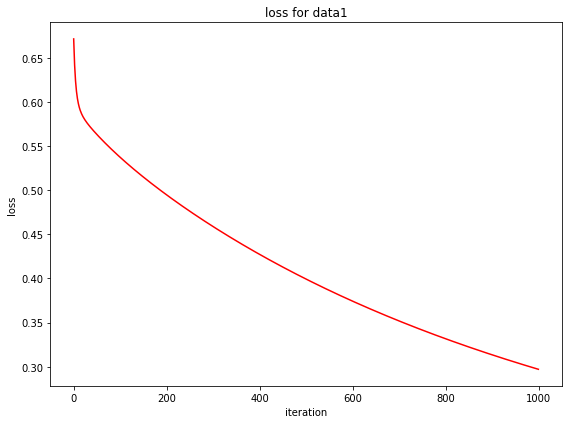

**************************************************
## [RESULT 06]
**************************************************


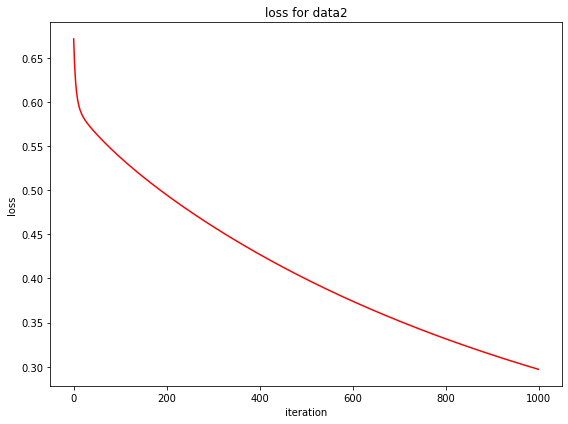

**************************************************
## [RESULT 07]
**************************************************


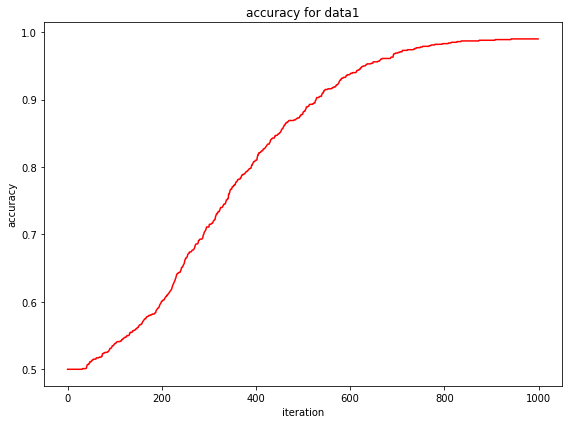

**************************************************
## [RESULT 08]
**************************************************


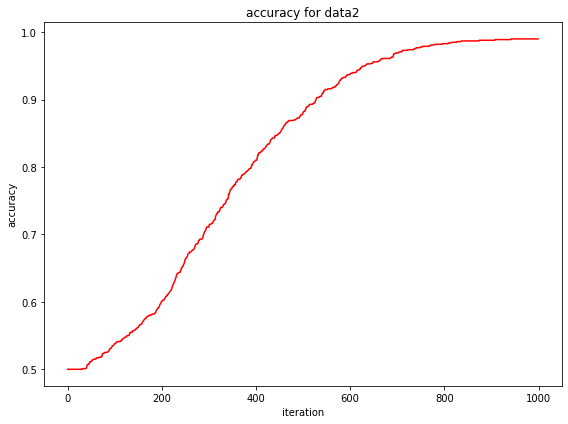

**************************************************
## [RESULT 09]
**************************************************


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


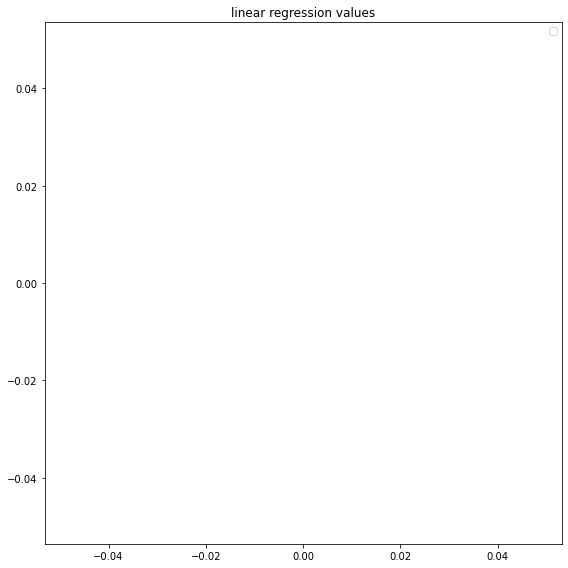

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 10]
**************************************************


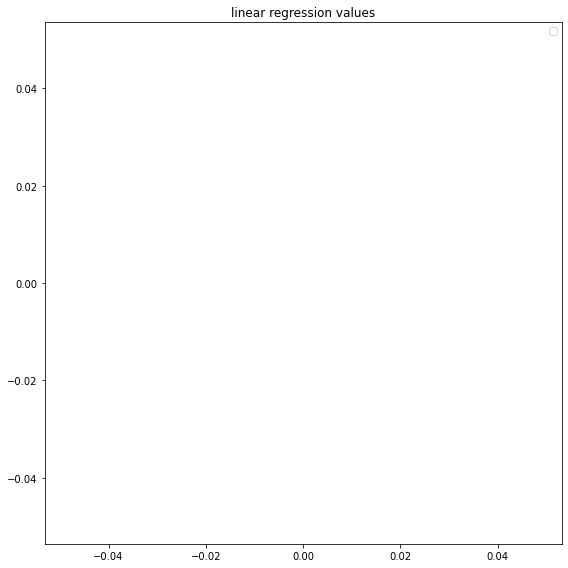

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 11]
**************************************************


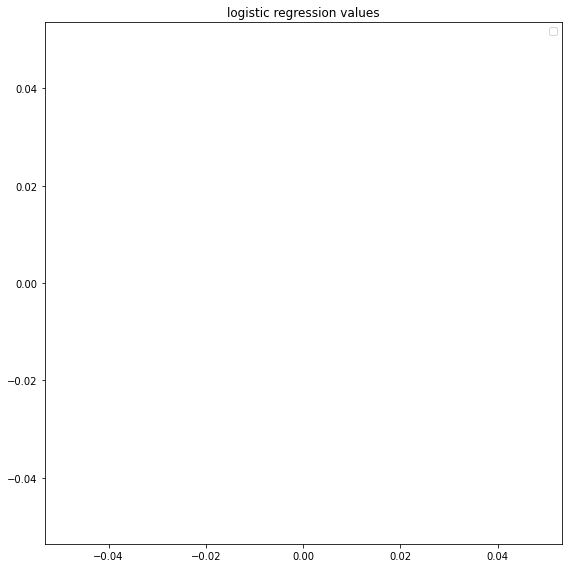

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 12]
**************************************************


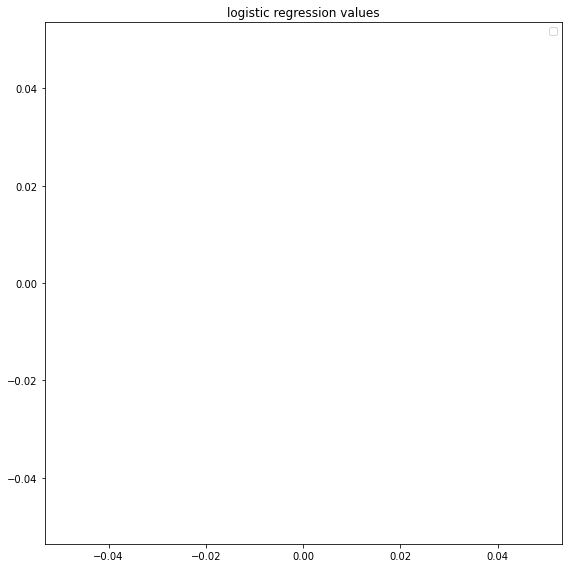

In [914]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)